#Testing the coefficients in a real simulation where the feedback is generated by the readout.

In [1]:
# Makes possible to show the output from matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Makes the figures in the PNG format:
# For more information see %config InlineBackend
%config InlineBackend.figure_formats=set([u'png'])

# plt.rcParams['figure.figsize'] = 5, 10

import numpy
import sys
import os
import scipy
from scipy import stats

import save_load_file as slf

##Measuring the difference between the generated curves
$MeanDistance=\frac{1}{N} \sum \limits_{n=1}^{N}  \lVert P_{Ideal}(n)-P_{Test}(n) \rVert$

$TotalLength=\sum \limits_{n=1}^{N}  \lVert P_{Ideal}(n)-P_{Ideal}(n-1) \rVert$

$METRIC=\frac{MeanDistance}{TotalLength}$

In [2]:
set_number = 0

sim_set_array=numpy.array(["set_02","set_03","set_xx","set_yy"])

sim_set = sim_set_array[set_number]

base_dir = "2DofArm_simulation_data"

In [3]:
# This is for the trajectory
# METRIC[noiselevel,decimationlevel,trial]
# METRIC_ALL[set_i,tji,noiselevel,decimationlevel,trial]
# The second number 4 below is related with the number of trajectories!
METRIC_ALL=numpy.zeros((4, 4, 3, 3, 50, 1),dtype=numpy.float)
for set_number in range(len(sim_set_array)):
    sim_set = sim_set_array[set_number]
    for tji in range(4):
        METRIC=slf.load_from_file("./"+base_dir+"/"+sim_set+"/metric_trajectory_trajectory_"+str(tji+1)+".pickles")
        METRIC_ALL[set_number,tji]=numpy.copy(METRIC)[:,:,:,:] # the :5 is used because the set_00 
                                                                # has 50 trials instead of 5

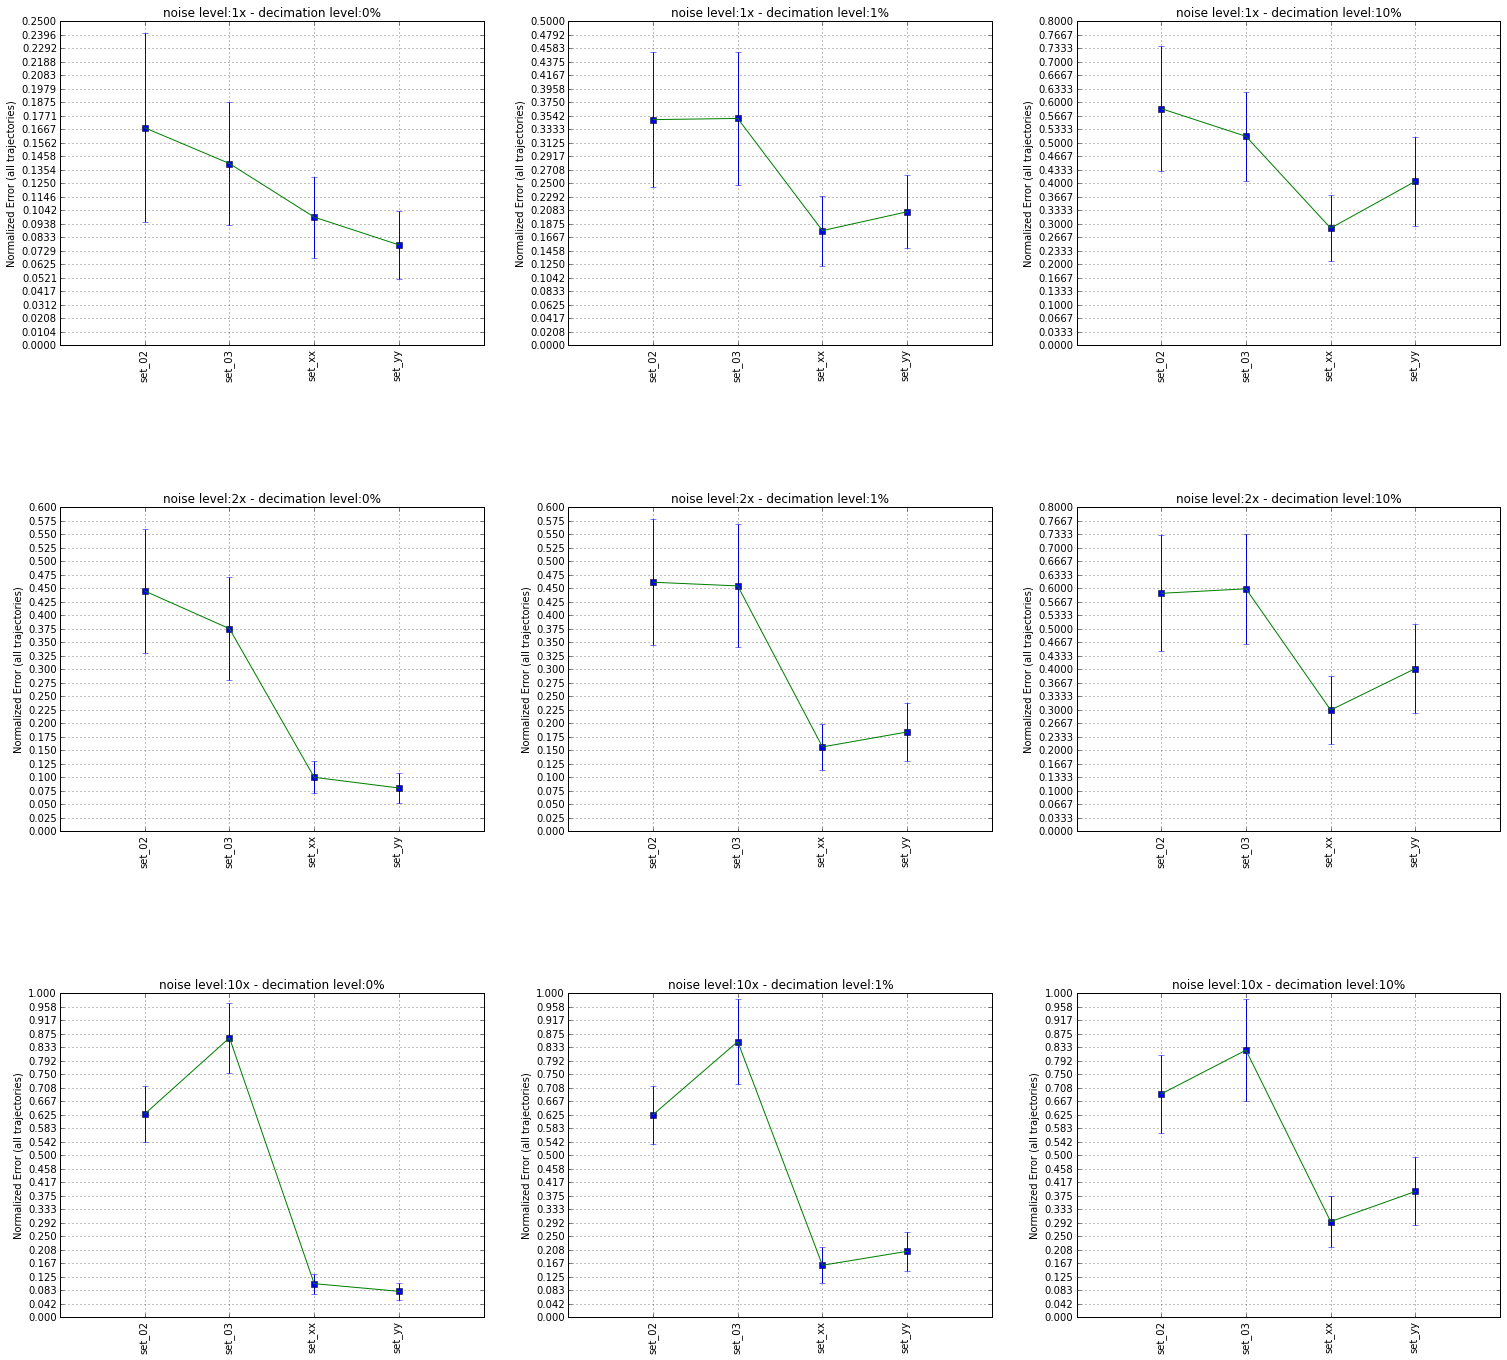

In [4]:
yrange = numpy.zeros((3,3,2))
yrange[0,0,:]=[0,0.25]
yrange[1,0,:]=[0,0.6]
yrange[2,0,:]=[0,1]
yrange[0,1,:]=[0,0.5]
yrange[0,2,:]=[0,0.8]
yrange[1,1,:]=[0,0.6]
yrange[2,1,:]=[0,1]
yrange[1,2,:]=[0,0.8]
yrange[2,2,:]=[0,1]

subplti=1
plt.figure(figsize =(20,20))
for noiselevel in range(3):
    for decimationlevel in range(3):
        plt.subplot(3,3,subplti)
        subplti+=1
        plt.errorbar(numpy.arange(len(sim_set_array)),\
                     [METRIC_ALL[set_i,:,noiselevel,decimationlevel,:].mean() for set_i in range(len(sim_set_array))],\
                     [METRIC_ALL[set_i,:,noiselevel,decimationlevel,:].std()/numpy.sqrt(len(METRIC_ALL[set_i,:,noiselevel,:,:])) for set_i in range(len(sim_set_array))],\
                     linestyle='None', marker='s')
        plt.plot(numpy.arange(len(sim_set_array)),[METRIC_ALL[set_i,:,noiselevel,decimationlevel,:].mean() for set_i in range(len(sim_set_array))],'-',label="N:"+['1x','2x','10x'][noiselevel] +" D:"+['0%','1%','10%'][decimationlevel])

        plt.title("noise level:"+['1x','2x','10x'][noiselevel]+" - decimation level:"+['0%','1%','10%'][decimationlevel])
        plt.ylabel("Normalized Error (all trajectories)")
        plt.xticks(numpy.arange(len(sim_set_array)), sim_set_array, rotation='vertical')
#         plt.legend(loc=0)
        plt.xlim(-1,len(sim_set_array))
        plt.ylim(*yrange[noiselevel,decimationlevel])
        plt.grid()
        plt.yticks(numpy.linspace(*yrange[noiselevel,decimationlevel],num=25))        
plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.2, hspace=.5)
plt.savefig("./"+base_dir+"/NormalizedError_All_Trajectories_50trials_STP.pdf", bbox_inches='tight',pad_inches=1)
plt.show()

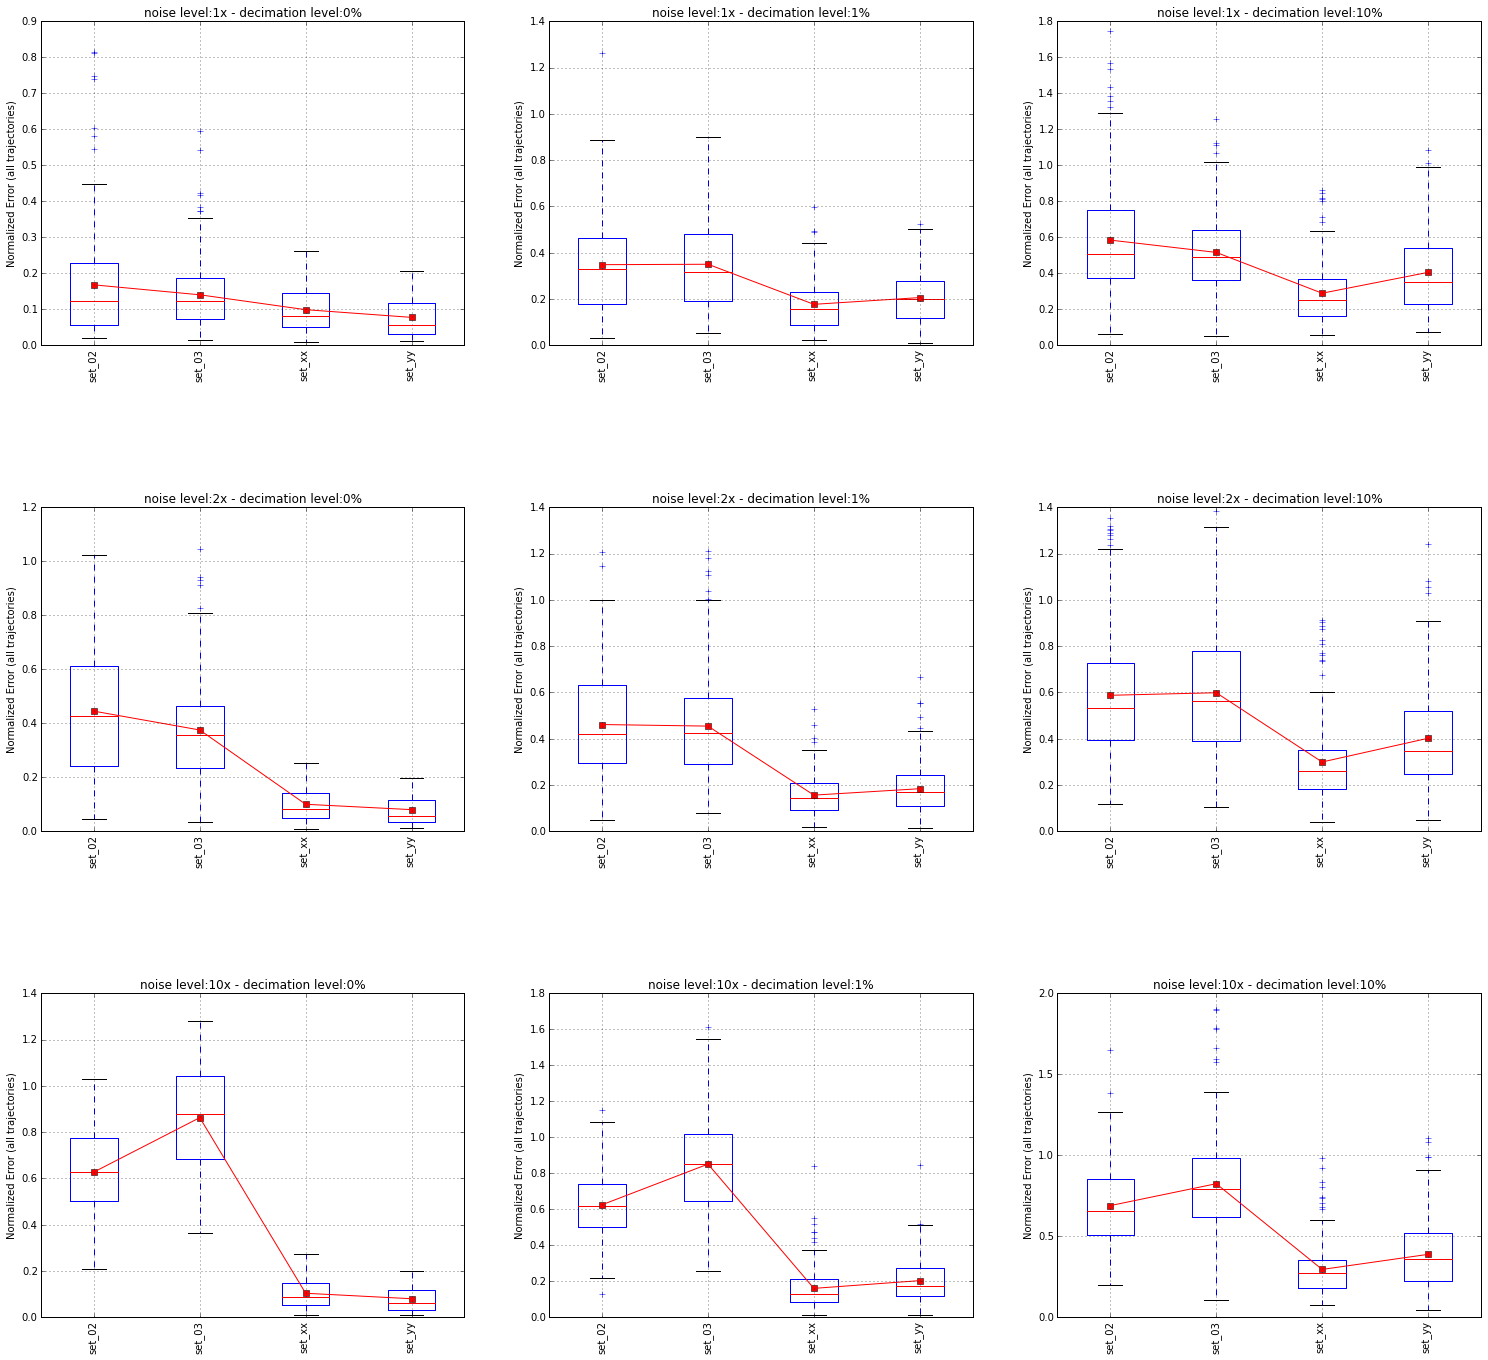

In [5]:
subplti=1
plt.figure(figsize =(20,20))
for noiselevel in range(3):
    for decimationlevel in range(3):
        plt.subplot(3,3,subplti)
        subplti+=1
        
        plt.boxplot([METRIC_ALL[set_i,:,noiselevel,decimationlevel,:].flatten() for set_i in range(len(sim_set_array))],\
                   meanline=False, showmeans=True, showfliers=True)

        plt.plot(range(1,len(sim_set_array)+1),[METRIC_ALL[set_i,:,noiselevel,decimationlevel,:].mean() for set_i in range(len(sim_set_array))],'r-')
            
        plt.title("noise level:"+['1x','2x','10x'][noiselevel]+" - decimation level:"+['0%','1%','10%'][decimationlevel])
        plt.ylabel("Normalized Error (all trajectories)")
        plt.xticks(range(1,len(sim_set_array)+1), sim_set_array, rotation='vertical')
#         plt.legend(loc=0)
#         plt.xlim(-1,len(sim_set_array))
#         plt.ylim(*yrange[noiselevel,decimationlevel])
        plt.grid()
#         plt.yticks(numpy.linspace(*yrange[noiselevel,decimationlevel],num=25))        
plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.2, hspace=.5)
plt.savefig("./"+base_dir+"/NormalizedError_All_Trajectories_boxplot_50trials_STP.pdf", bbox_inches='tight',pad_inches=1)
plt.show()

In [11]:
# Small p-value indicates different means (rejects the null hypotesis mean1=mean2)
# stats.ttest_ind(P1,P2, equal_var=False) performs this: https://en.wikipedia.org/wiki/Welch%27s_t_test
print "Is the noise making any difference in the trajectory: "+str(tji)+" (Set 02 and 03)?"
for noiselevel in range(3):
    for decimationlevel in range(3):
        P1,P2 = METRIC_ALL[0,:,noiselevel,decimationlevel,:].flatten(),METRIC_ALL[1,:,noiselevel,decimationlevel,:].flatten()        
        print "noise level:"+['1x','2x','10x'][noiselevel]+" - decimation level:"+['0%','1%','10%'][decimationlevel]," Welch’s t-test - ", stats.ttest_ind(P1,P2, equal_var=False)        
        print 

Is the noise making any difference in the trajectory: 3 (Set 02 and 03)?
noise level:1x - decimation level:0%  Welch’s t-test -  (2.2445513576231728, 0.025437140993306014)

noise level:1x - decimation level:1%  Welch’s t-test -  (-0.088600530335472841, 0.92944396718735833)

noise level:1x - decimation level:10%  Welch’s t-test -  (2.5500801519882512, 0.011182886477431023)

noise level:2x - decimation level:0%  Welch’s t-test -  (3.2979757621173542, 0.0010642196012359902)

noise level:2x - decimation level:1%  Welch’s t-test -  (0.29398585600426208, 0.76892205926819623)

noise level:2x - decimation level:10%  Welch’s t-test -  (-0.39629129101654148, 0.69210308070071558)

noise level:10x - decimation level:0%  Welch’s t-test -  (-12.010321654198334, 2.1942724896976014e-28)

noise level:10x - decimation level:1%  Welch’s t-test -  (-10.044735738305075, 4.7879160753079946e-21)

noise level:10x - decimation level:10%  Welch’s t-test -  (-4.8401024049375945, 1.9040487570449057e-06)



In [12]:
# Small p-value indicates different means (rejects the null hypotesis mean1=mean2)
# stats.ttest_ind(P1,P2, equal_var=False) performs this: https://en.wikipedia.org/wiki/Welch%27s_t_test
print "Is the noise making any difference in the trajectory: "+str(tji)+" (Set XX and YY)?"
for noiselevel in range(3):
    for decimationlevel in range(3):
        P1,P2 = METRIC_ALL[2,:,noiselevel,decimationlevel,:].flatten(),METRIC_ALL[3,:,noiselevel,decimationlevel,:].flatten()        
        print "noise level:"+['1x','2x','10x'][noiselevel]+" - decimation level:"+['0%','1%','10%'][decimationlevel]," Welch’s t-test - ", stats.ttest_ind(P1,P2, equal_var=False)        
        print 

Is the noise making any difference in the trajectory: 3 (Set XX and YY)?
noise level:1x - decimation level:0%  Welch’s t-test -  (3.6963973141027697, 0.00025019626251670103)

noise level:1x - decimation level:1%  Welch’s t-test -  (-2.6262188236267514, 0.0089677960515029288)

noise level:1x - decimation level:10%  Welch’s t-test -  (-5.935542400882091, 6.7697719365045736e-09)

noise level:2x - decimation level:0%  Welch’s t-test -  (3.4343125621389681, 0.00065690188218766622)

noise level:2x - decimation level:1%  Welch’s t-test -  (-2.8736480775601474, 0.004285040044803185)

noise level:2x - decimation level:10%  Welch’s t-test -  (-5.1875222647593668, 3.5025426146524545e-07)

noise level:10x - decimation level:0%  Welch’s t-test -  (4.0819322122356878, 5.4134227188831408e-05)

noise level:10x - decimation level:1%  Welch’s t-test -  (-3.6621341573477046, 0.00028410145769846722)

noise level:10x - decimation level:10%  Welch’s t-test -  (-5.0245019965810735, 7.9003273657899807e-07)



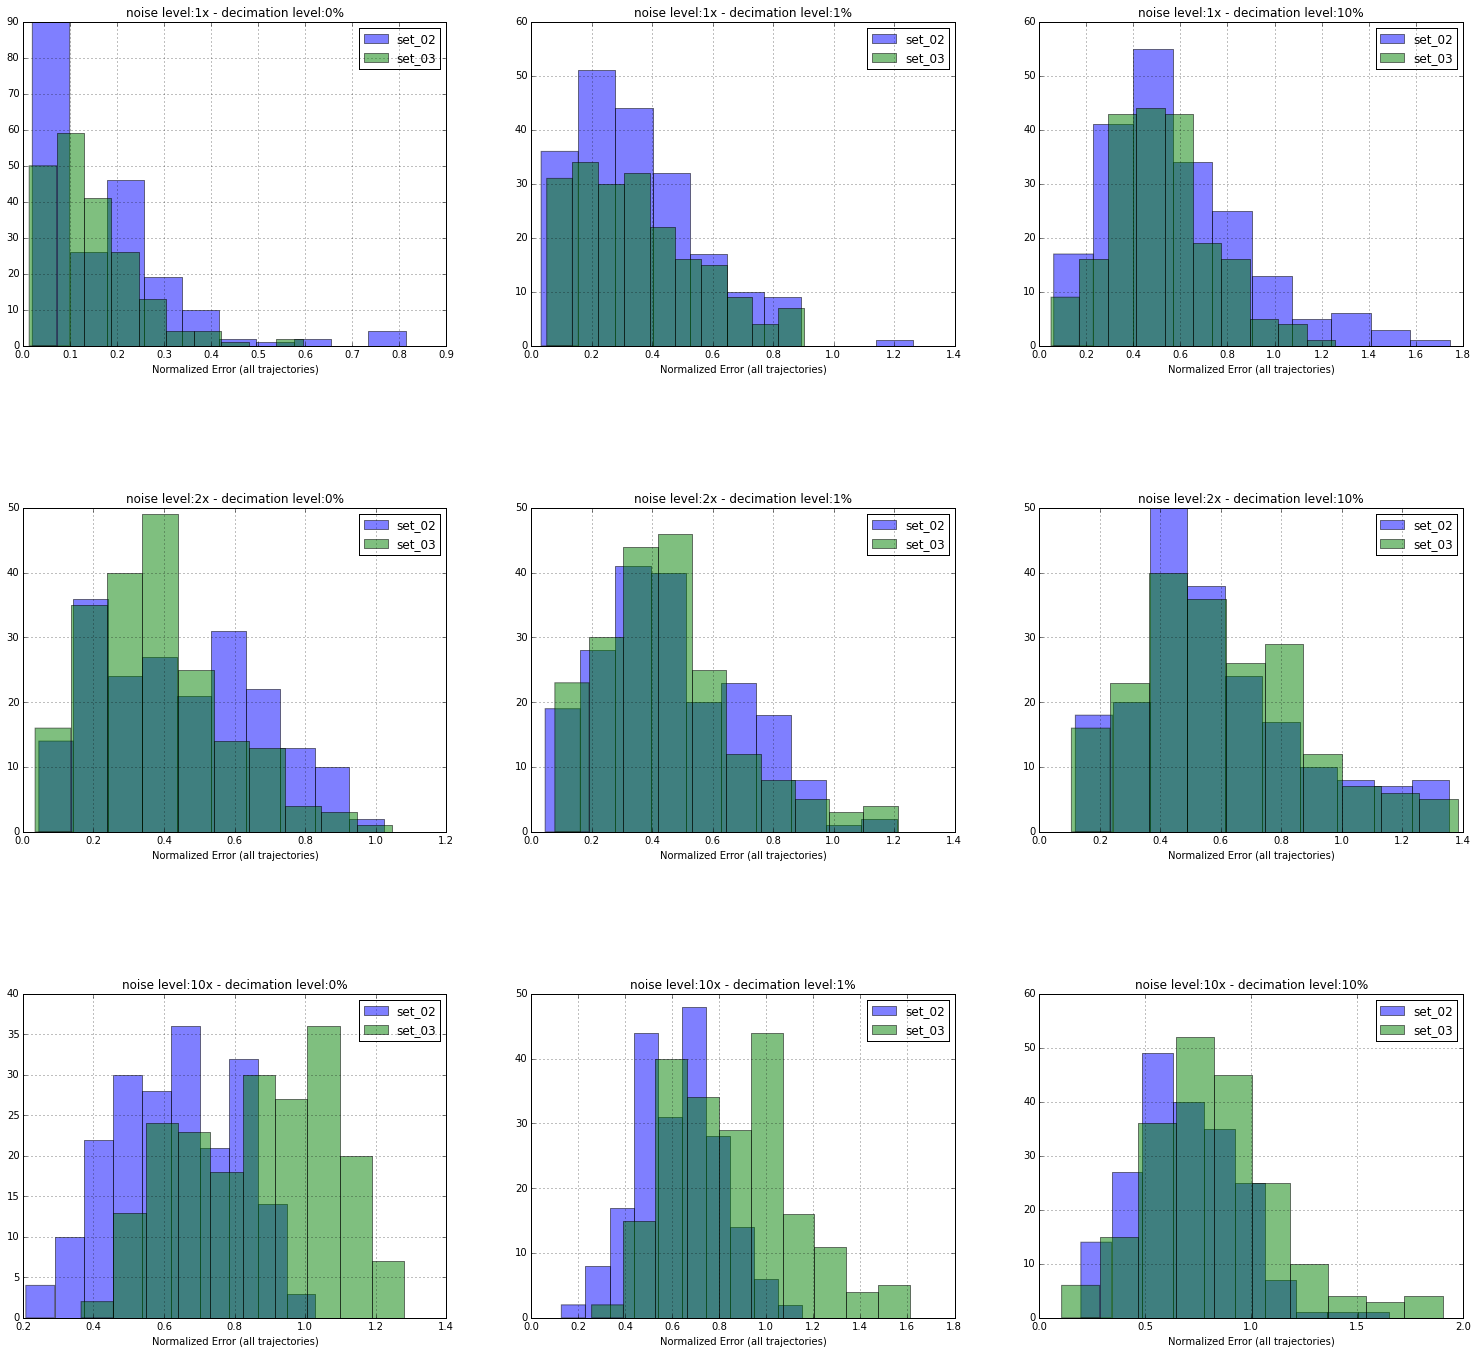

In [8]:
selected_set=[0,1] 

subplti=1
plt.figure(figsize =(20,20))
for noiselevel in range(3):
    for decimationlevel in range(3):
        plt.subplot(3,3,subplti)
        subplti+=1
        
        for set_i in selected_set:
            plt.hist(METRIC_ALL[set_i,:,noiselevel,decimationlevel,:].flatten(), alpha=0.5, label=sim_set_array[set_i]);
            
        plt.title("noise level:"+['1x','2x','10x'][noiselevel]+" - decimation level:"+['0%','1%','10%'][decimationlevel])
        plt.xlabel("Normalized Error (all trajectories)")
#         plt.xticks(range(1,len(sim_set_array)+1), sim_set_array, rotation='vertical')
        plt.legend(loc=0)
#         plt.xlim(-1,len(sim_set_array))
#         plt.ylim(*yrange[noiselevel,decimationlevel])
        plt.grid()
#         plt.yticks(numpy.linspace(*yrange[noiselevel,decimationlevel],num=25))        
plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.2, hspace=.5)
# plt.savefig("./"+base_dir+"/NormalizedError_All_Trajectories_boxplot_50trials_STP.pdf", bbox_inches='tight',pad_inches=1)
plt.show()

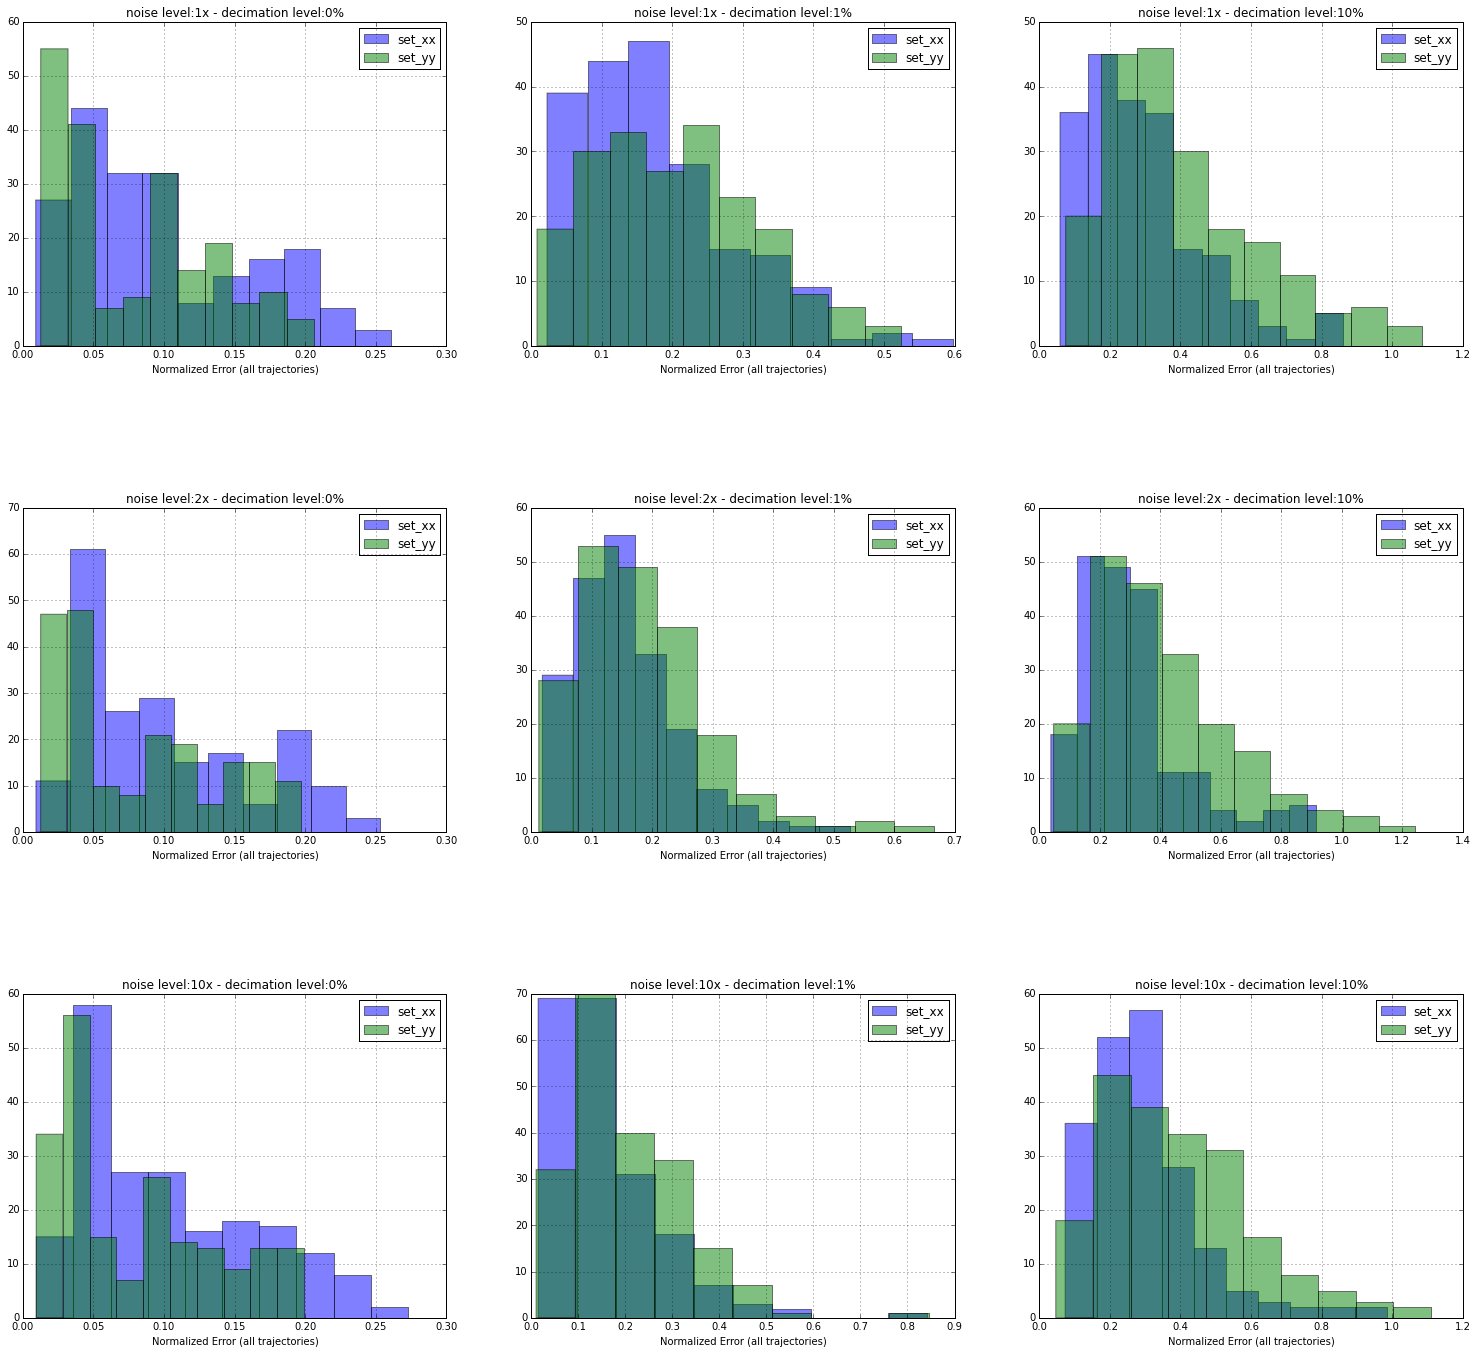

In [9]:
selected_set=[2,3] 

subplti=1
plt.figure(figsize =(20,20))
for noiselevel in range(3):
    for decimationlevel in range(3):
        plt.subplot(3,3,subplti)
        subplti+=1
        
        for set_i in selected_set:
            plt.hist(METRIC_ALL[set_i,:,noiselevel,decimationlevel,:].flatten(), alpha=0.5, label=sim_set_array[set_i]);
            
        plt.title("noise level:"+['1x','2x','10x'][noiselevel]+" - decimation level:"+['0%','1%','10%'][decimationlevel])
        plt.xlabel("Normalized Error (all trajectories)")
#         plt.xticks(range(1,len(sim_set_array)+1), sim_set_array, rotation='vertical')
        plt.legend(loc=0)
#         plt.xlim(-1,len(sim_set_array))
#         plt.ylim(*yrange[noiselevel,decimationlevel])
        plt.grid()
#         plt.yticks(numpy.linspace(*yrange[noiselevel,decimationlevel],num=25))        
plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.2, hspace=.5)
# plt.savefig("./"+base_dir+"/NormalizedError_All_Trajectories_boxplot_50trials_STP.pdf", bbox_inches='tight',pad_inches=1)
plt.show()

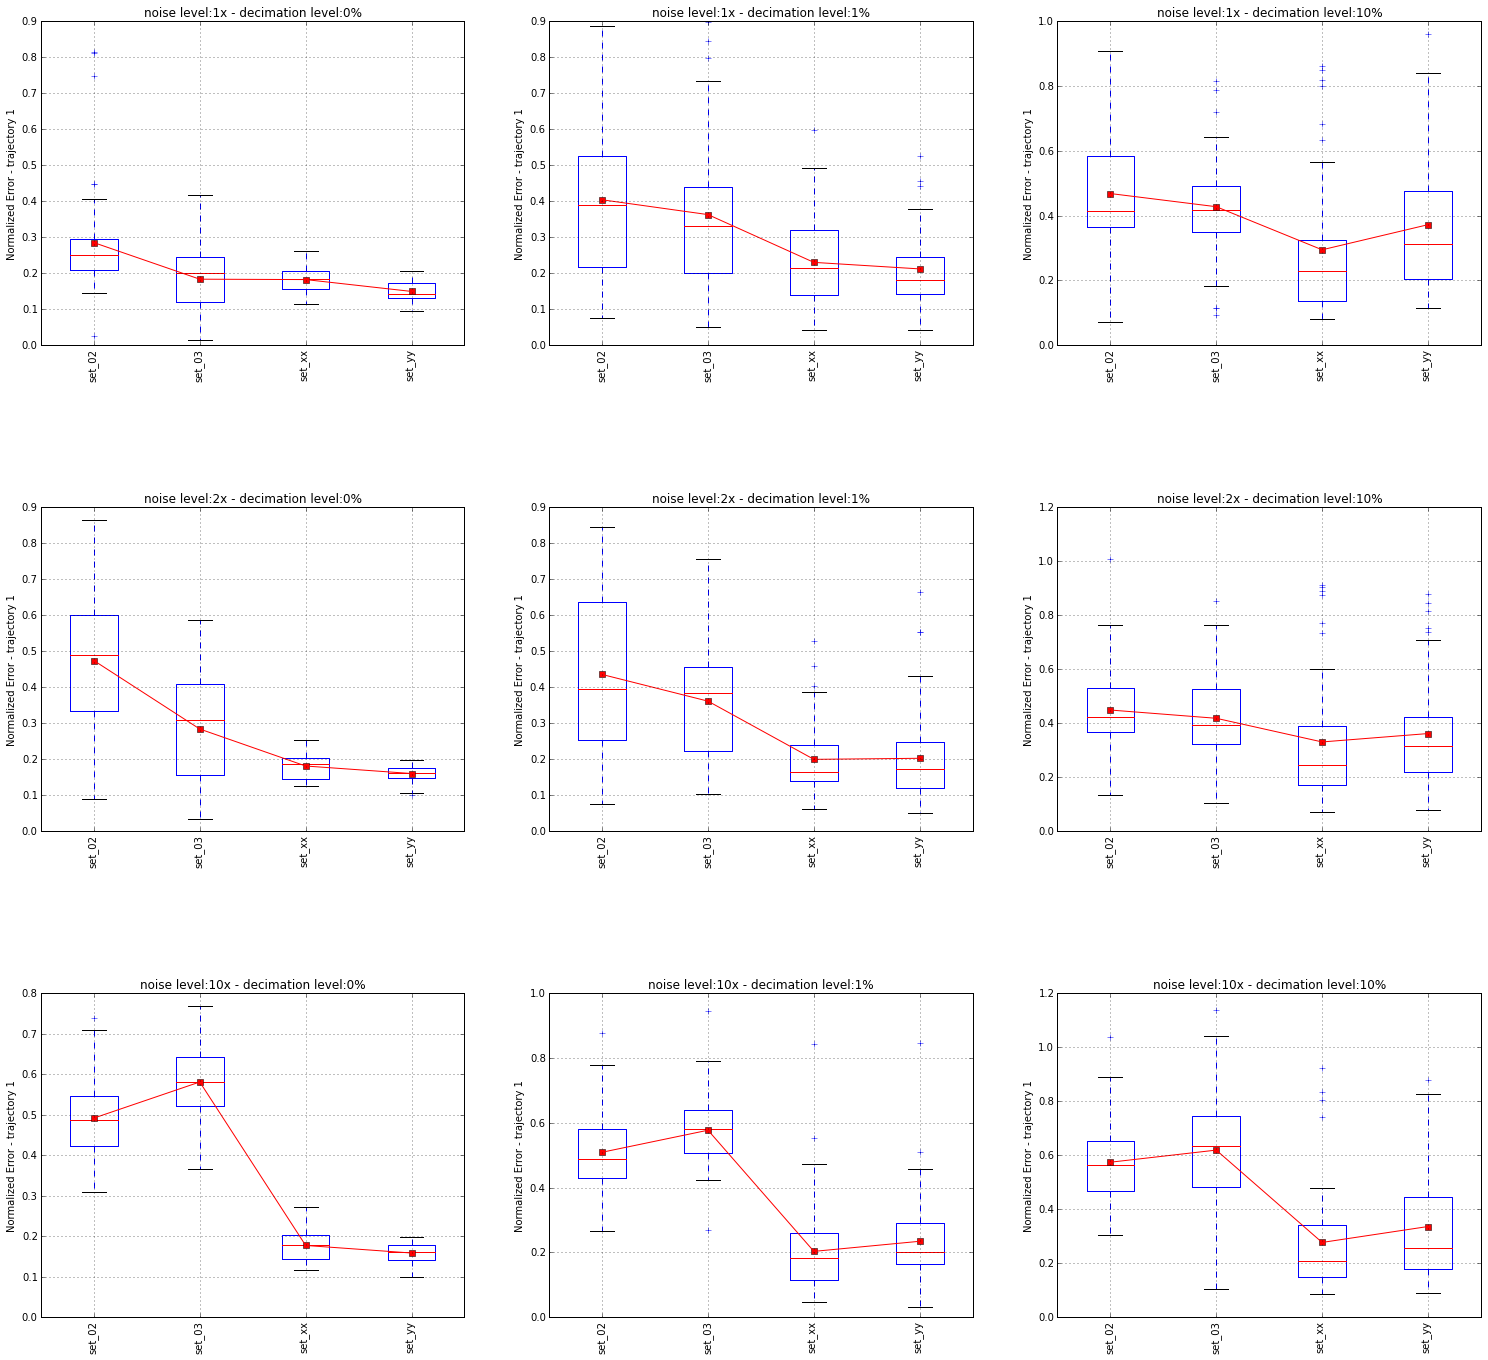

In [10]:
tji=1

subplti=1
plt.figure(figsize =(20,20))
for noiselevel in range(3):
    for decimationlevel in range(3):
        plt.subplot(3,3,subplti)
        subplti+=1
        
        plt.boxplot([METRIC_ALL[set_i,tji-1,noiselevel,decimationlevel,:].flatten() for set_i in range(len(sim_set_array))],\
                   meanline=False, showmeans=True, showfliers=True)

        plt.plot(range(1,len(sim_set_array)+1),[METRIC_ALL[set_i,tji-1,noiselevel,decimationlevel,:].mean() for set_i in range(len(sim_set_array))],'r-')
            
        plt.title("noise level:"+['1x','2x','10x'][noiselevel]+" - decimation level:"+['0%','1%','10%'][decimationlevel])
        plt.ylabel("Normalized Error - trajectory "+str(tji))
        plt.xticks(range(1,len(sim_set_array)+1), sim_set_array, rotation='vertical')
        plt.grid()
plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.2, hspace=.5)
plt.savefig("./"+base_dir+"/NormalizedError_All_Trajectories_boxplot_50trials_STP.pdf", bbox_inches='tight',pad_inches=1)
plt.show()

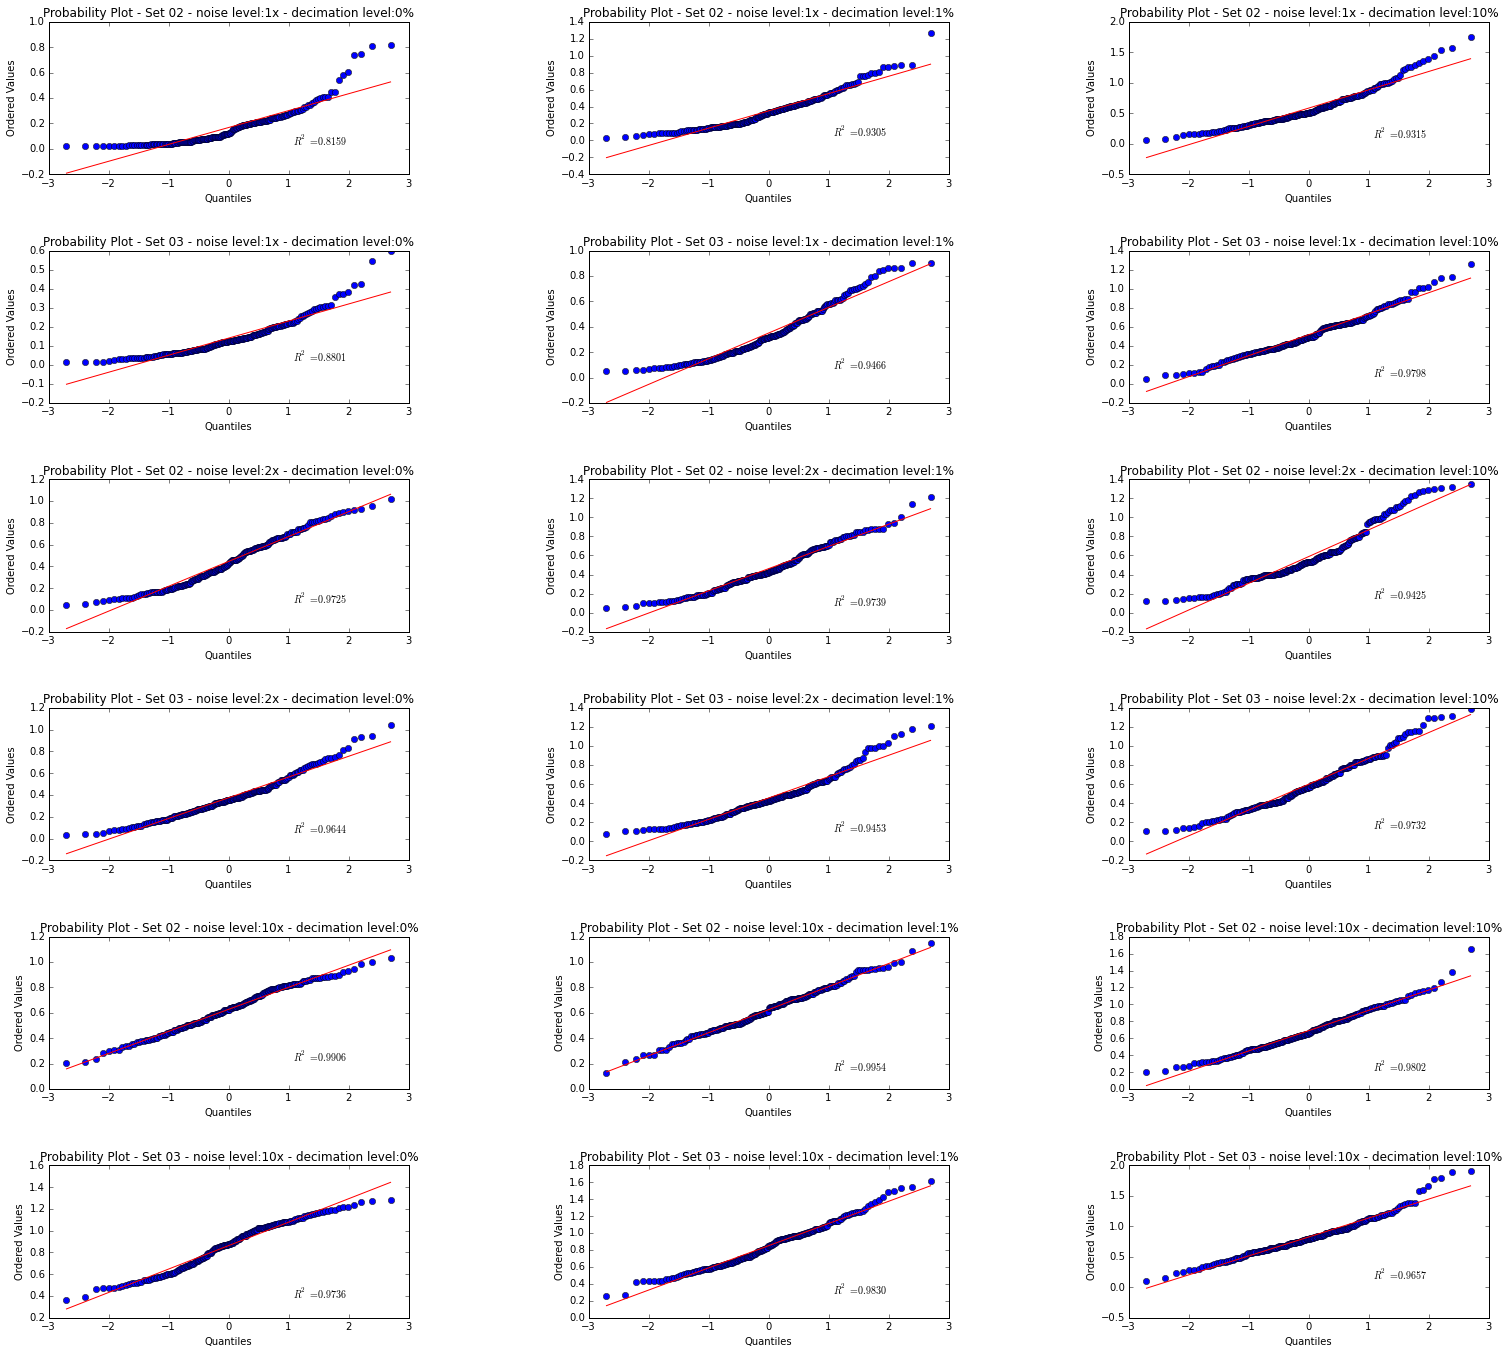

In [102]:
plt.figure(figsize =(20,20))
subplti=0
subplti_list = numpy.array([\
                       [1,4],[2,5],[3,6],\
                       [7,10],[8,11],[9,12],\
                       [13,16],[14,17],[15,18]
                      ])
for noiselevel in range(3):
    for decimationlevel in range(3):
        plt.subplot(6,3,subplti_list[subplti][0])
        scipy.stats.probplot(METRIC_ALL[0,:,noiselevel,decimationlevel,:].flatten(), sparams=(), dist='norm', fit=True, plot=plt);
        plt.title("Probability Plot - Set 02 - " + "noise level:"+['1x','2x','10x'][noiselevel]+" - decimation level:"+['0%','1%','10%'][decimationlevel])

        plt.subplot(6,3,subplti_list[subplti][1])
        scipy.stats.probplot(METRIC_ALL[1,:,noiselevel,decimationlevel,:].flatten(), sparams=(), dist='norm', fit=True, plot=plt);        
        plt.title("Probability Plot - Set 03 - " + "noise level:"+['1x','2x','10x'][noiselevel]+" - decimation level:"+['0%','1%','10%'][decimationlevel])

        subplti+=1
        
    plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.5, hspace=.5)
# plt.savefig("./"+base_dir+"/NormalDistributionVerification_STP_02-03_g1.pdf", bbox_inches='tight',pad_inches=1)
plt.show()

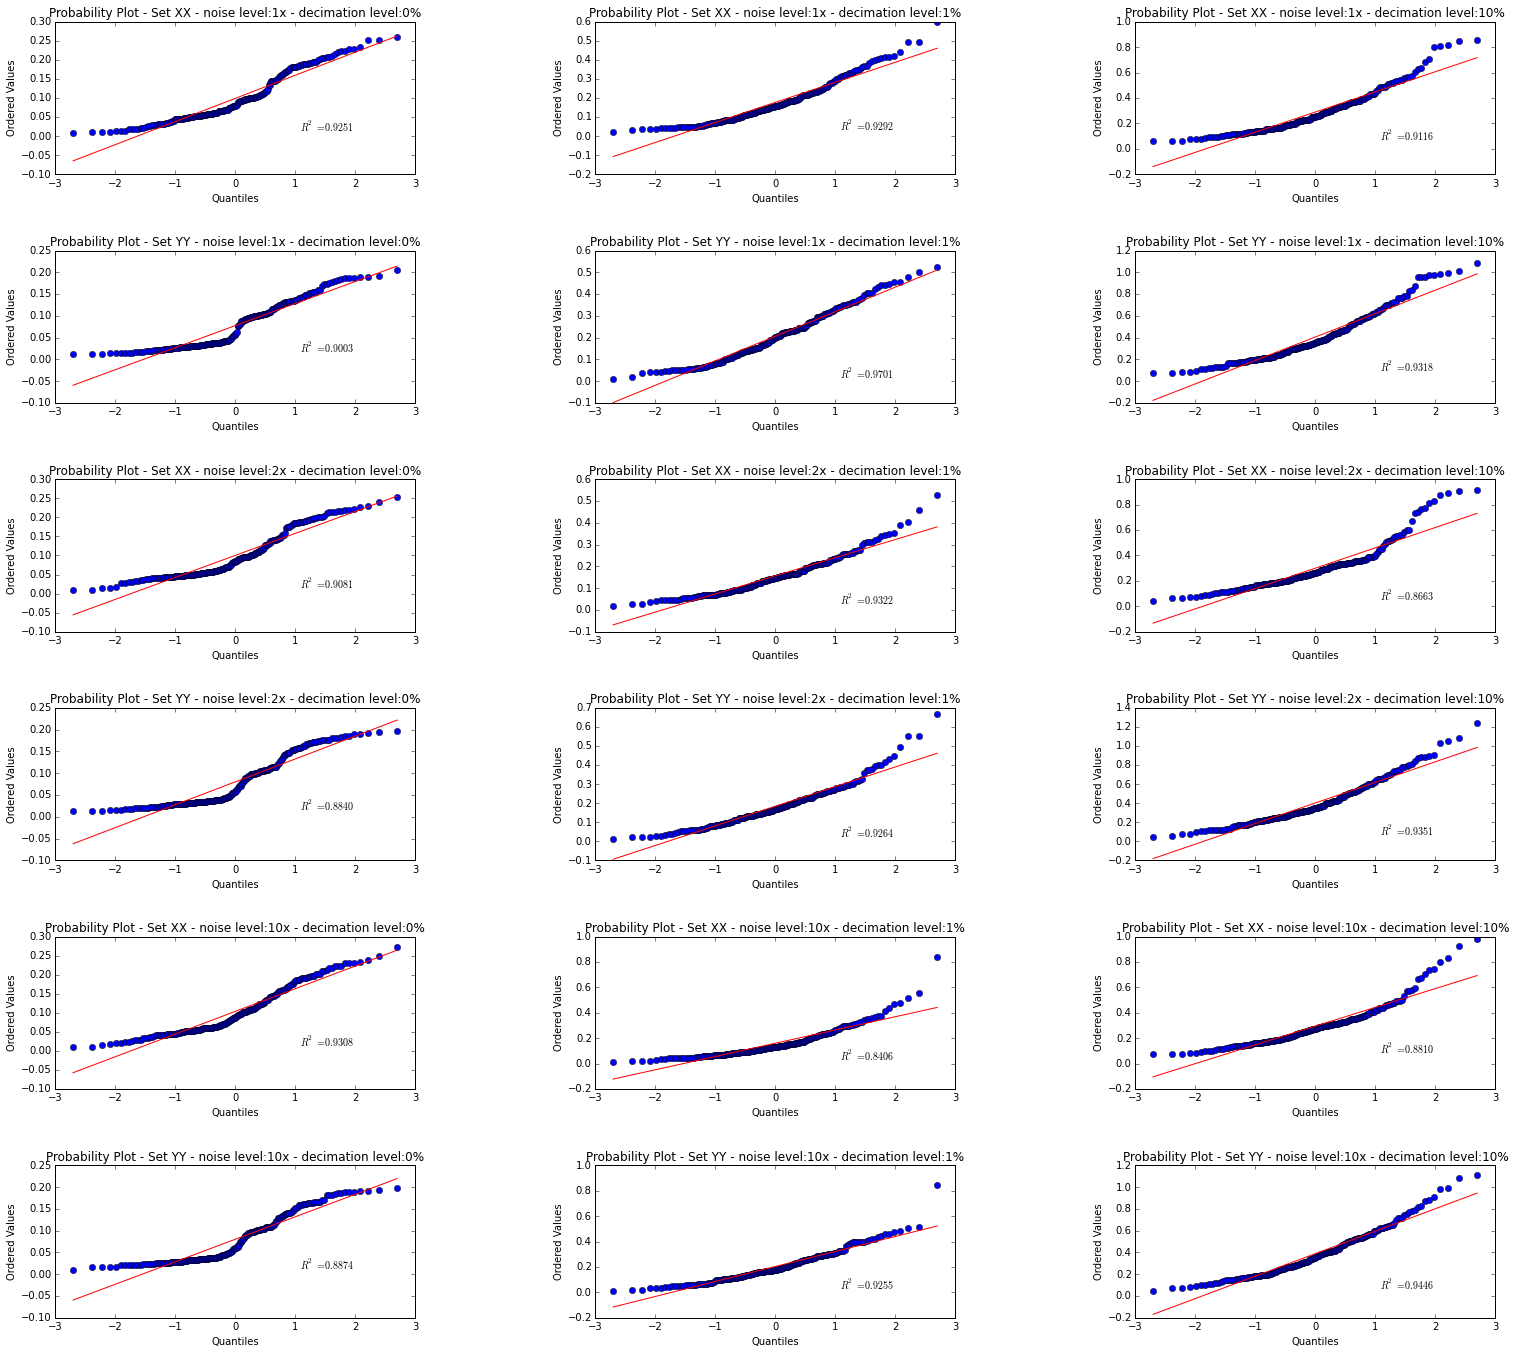

In [7]:
plt.figure(figsize =(20,20))
subplti=0
subplti_list = numpy.array([\
                       [1,4],[2,5],[3,6],\
                       [7,10],[8,11],[9,12],\
                       [13,16],[14,17],[15,18]
                      ])
for noiselevel in range(3):
    for decimationlevel in range(3):
        plt.subplot(6,3,subplti_list[subplti][0])
        scipy.stats.probplot(METRIC_ALL[2,:,noiselevel,decimationlevel,:].flatten(), sparams=(), dist='norm', fit=True, plot=plt);
        plt.title("Probability Plot - Set XX - " + "noise level:"+['1x','2x','10x'][noiselevel]+" - decimation level:"+['0%','1%','10%'][decimationlevel])

        plt.subplot(6,3,subplti_list[subplti][1])
        scipy.stats.probplot(METRIC_ALL[3,:,noiselevel,decimationlevel,:].flatten(), sparams=(), dist='norm', fit=True, plot=plt);        
        plt.title("Probability Plot - Set YY - " + "noise level:"+['1x','2x','10x'][noiselevel]+" - decimation level:"+['0%','1%','10%'][decimationlevel])

        subplti+=1
        
    plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.5, hspace=.5)
plt.savefig("./"+base_dir+"/NormalDistributionVerification_STP_XX-YY_g1.pdf", bbox_inches='tight',pad_inches=1)
plt.show()

In [12]:
# The normality test tells me that the samples are not normally distributed, 
# but when I calculate the ttest and the KV (nonparametric) the results are almost the same!!!!
print 'normaltest teststat = %6.3f pvalue = %6.4f' % scipy.stats.normaltest(METRIC_ALL[0,:,2,0,:].flatten())

normaltest teststat =  7.804 pvalue = 0.0202
normaltest teststat =  1.181 pvalue = 0.5541


In [83]:
# METRIC_ALL[set_i,tji,noiselevel,decimationlevel,trial]
print 'normaltest teststat = %6.3f pvalue = %6.4f' % scipy.stats.normaltest(METRIC_ALL[0,:,0,0,:].flatten())
print 'normaltest teststat = %6.3f pvalue = %6.4f' % scipy.stats.normaltest(numpy.random.normal(loc=0,scale=10,size=50))

normaltest teststat = 91.832 pvalue = 0.0000
normaltest teststat =  0.876 pvalue = 0.6454


In [95]:
sim_set = sim_set_array[3] # ["set_02","set_03","set_xx","set_yy"]

# HERE I GENERATE THE DATA NECESSARY TO AVERAGE THE OUTPUT SPIKES
noiselevel=0
decimationlevel=0

total_trials=50
NofN=600
spikes_total = numpy.zeros((4,total_trials,250,NofN))

subplti=1
for tji in range(1,5):
    for run_number in range(1,total_trials+1): 
        OutputSpks_save = slf.load_from_file("./"+base_dir+"/"+sim_set+"/OutputSpks_save_"+str(tji)+"_noise_level_"+str(noiselevel)+"_killed_neurons_"+str(decimationlevel)+"_run_"+str(run_number)+".pickles")
        for i in range(250):
            spikes_total[tji-1,run_number-1,i,OutputSpks_save[i,0]]=1


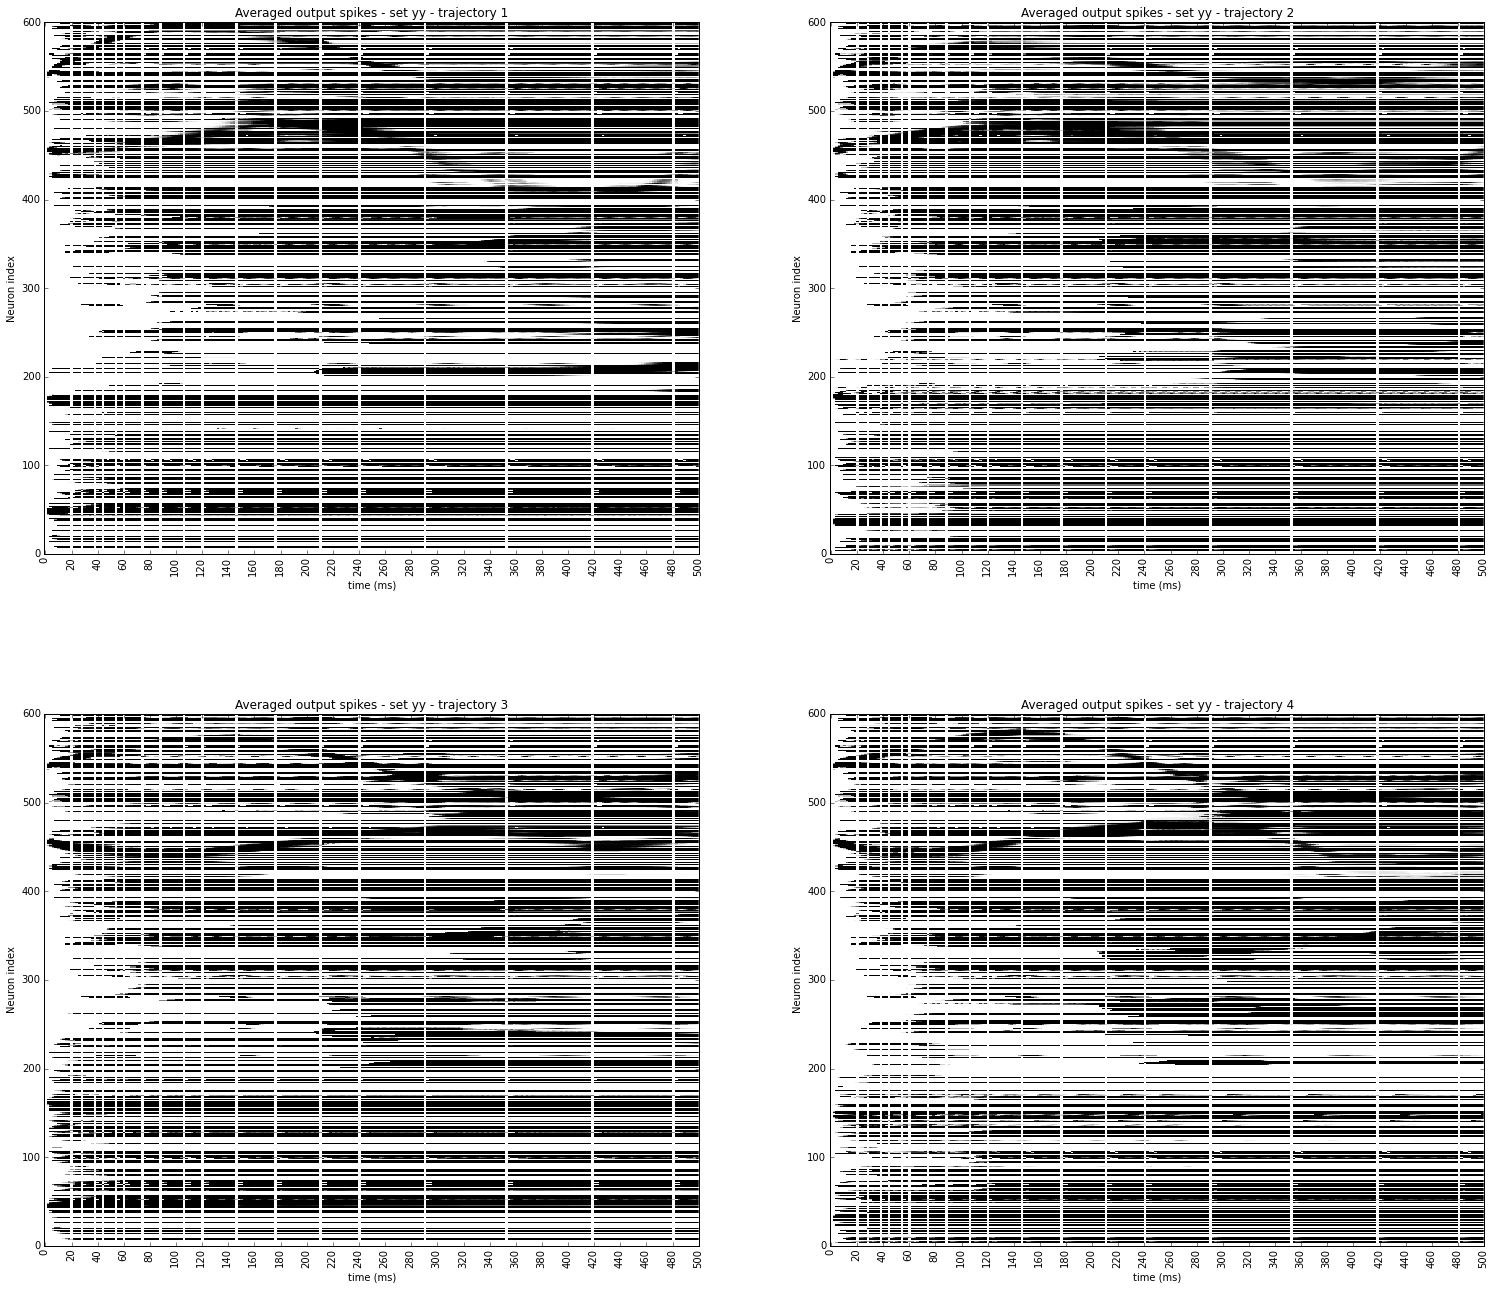

In [96]:
plt.figure(figsize =(20,10))
subplti=1
for tji in range(1,5):
    plt.subplot(2,2,subplti)    
    subplti+=1
    spikes_img=numpy.flipud(spikes_total[tji-1].mean(axis=0).T)
    plt.imshow(spikes_img,cmap=cm.gray_r,vmin=0,vmax=1,interpolation='nearest', aspect='auto')
    plt.yticks(range(0,700,100),range(600,-100,-100))
    plt.xticks(range(0,260,10),numpy.array(range(0,260,10))*2, rotation='vertical')
    plt.title("Averaged output spikes - set "+str(sim_set)[-2:]+" - trajectory "+str(tji))
    plt.ylabel("Neuron index")
    plt.xlabel("time (ms)")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1.7, wspace=.2, hspace=.3)    
plt.savefig(os.getcwd()+"/"+base_dir+"/"+sim_set+"/output_spikes_mean_"+sim_set+".pdf", bbox_inches='tight',pad_inches=1) 
plt.show()